# International Migration flows to Canada: The 2015 revision -- DataViz

Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from math import pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from bokeh.io import show, output_notebook
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter, HoverTool, ColumnDataSource
from bokeh.plotting import figure, output_file, save
output_notebook()

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Loading BokehJS ...

### Load Dataset & Data Preprocessing

In [2]:
# Load .xlsx file
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter = 2)
df_imcanada = df.copy()

# Drop unimpactful columns
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage' , 'AreaName', 'RegName', 'DevName'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country'}, inplace=True)
df.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1


## Overview of the Number of Migration using Bokeh Plot over 1980-2013

#### Data Preparation for the visualization

In [3]:
# Cast the type of the Country column as String and set this column as index
df['Country'] = df['Country'].astype(str)
df = df.set_index('Country')

# Set the names of the columns as 'Year'
df.columns.name = 'Year'

# Convert the Names of the Columns to String
df.columns = list(map(str, df.columns))
all(isinstance(column, str) for column in df.columns)

True

In [4]:
country = list(df.index)
years = list(df.columns)

# reshape to 1D array or rates with a month and year for each row.
data = pd.DataFrame(df.stack(), columns=['rate']).reset_index()
data.rename(columns={'level_1':'Year'}, inplace=True)
data = data[['Year', 'Country', 'rate']]
data.head()

,Year,Country,rate
0,1980,Afghanistan,16
1,1981,Afghanistan,39
2,1982,Afghanistan,39
3,1983,Afghanistan,47
4,1984,Afghanistan,71


In [5]:
colors = ['#e3edf6','#dde9f4','#d6e5f2','#d0e1f0','#caddee','#c4d9ec','#bed6ea','#b7d2e8','#b1cee6','#abcae4','#a5c6e2','#9fc2e0','#99bede','#92badc','#8cb6da','#86b2d8','#80afd6','#7aabd4','#74a7d2','#6da3d0','#679fce','#619bcc','#5b97ca','#5593c8','#4f8fc6','#488bc4','#4288c2','#3d84bf','#3b7fb9','#397bb3','#3777ac','#3573a6','#336ea0','#316a9a','#2f6694','#2d618e','#2b5d87','#295981','#255075','#234c6f','#214868','#1f4462','#1d3f5c','#1b3b56','#193750','#17334a','#152e43','#132a3d','#112637','#0f2231','#0d1d2b','#0b1925','#09151e','#071118','#050c12','#03080c',]
mapper = LinearColorMapper(palette = colors, low=data.rate.min(), high=data.rate.max())

TOOLS = "hover, save, pan, box_zoom, reset, wheel_zoom"

TOOLTIPS = [
    ("Country", "@Country"),
    ("Year", "@Year"),
    ("Number of Migration", "@rate")]

p = figure(title="International Migration to Canada over ({0} - {1})".format(years[0], years[-1]),
           x_range=years, y_range=(country),
           x_axis_location="above", plot_width=1100, plot_height=1900,
           tools=TOOLS, tooltips = TOOLTIPS, toolbar_location='below')

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Year", y="Country", width=1, height=1,
       source=data,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None, name = "Number of Migration to Canada")

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="12px",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     label_standoff=20, border_line_color=None, location=(1, 1))

p.add_layout(color_bar, 'right')
output_file("output_bokeh.html")
save(p)

'C:\\Users\\sumai\\projects\\Viz\\Immigration to Canada\\output_bokeh.html'

## Countries that contributed the most and least in the Migration Process over 1980-2013

#### Data Preparation for the visualization

In [6]:
df_imcanada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_imcanada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_imcanada.columns = list(map(str, df_imcanada.columns))
df_imcanada.set_index('Country', inplace=True)
df_imcanada['Total'] = df_imcanada.sum(axis=1)
df_imcanada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df_imcanada.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_imcanada.head(5)

df_top5 = df_top5[years].transpose() 
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [8]:
# Convert the Indices to Integer
df_top5.index = list(map(int, df_top5.index))
all(isinstance(column, int) for column in df_top5.index)

True

Text(0.5, 0, 'Years')

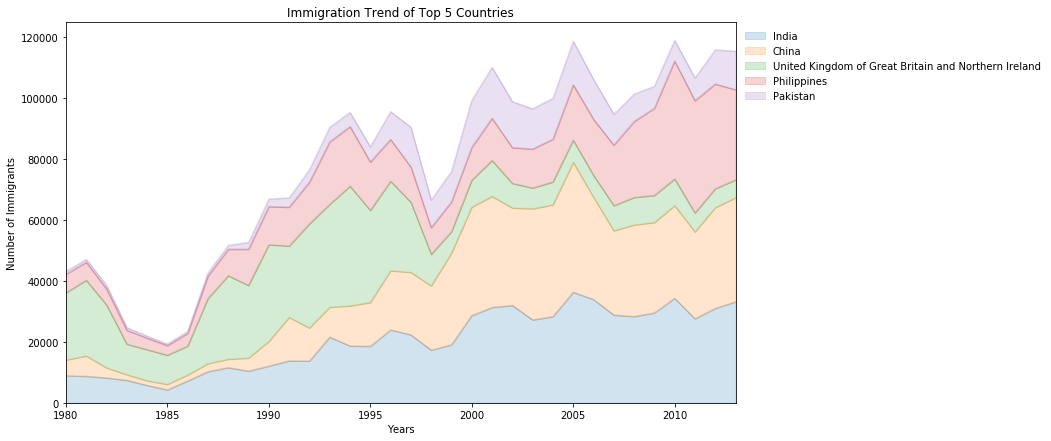

In [9]:
ax = df_top5.plot(kind='area', alpha=0.2, figsize=(12, 7), xlim = (1980, 2013))
plt.legend(bbox_to_anchor=(1, 1), frameon = False)

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [10]:
# sort dataframe on 'Total' column (descending)
df_imcanada.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_imcanada['Total'].head(15)
df_top15

Country
Palau                     1
Western Sahara            2
Marshall Islands          2
New Caledonia             5
San Marino                5
American Samoa            6
Tuvalu                    8
Sao Tome and Principe    10
Vanuatu                  11
Kiribati                 15
Andorra                  15
Nauru                    18
Canada                   20
Monaco                   29
Maldives                 30
Name: Total, dtype: int64

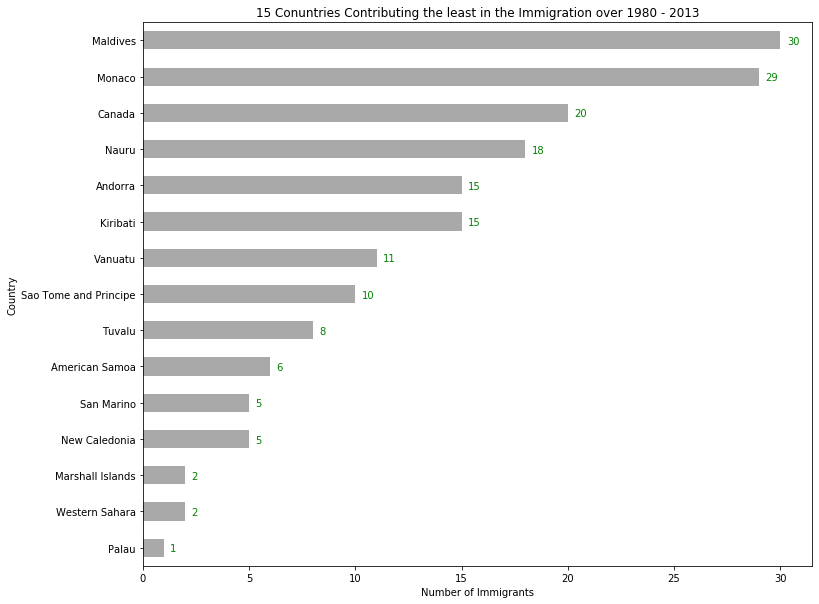

In [11]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 10), color='darkgray')
plt.xlabel('Number of Immigrants')
plt.title('15 Conuntries Contributing the least in the Immigration over 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value + 0.3, index - 0.10), color='green')

plt.show()

## Top 3 countries Immigrated to Canada over 2000-2013

#### Data Preparation for the visualization

In [12]:
cols_to_keep = ['2000', '2001','2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010','2011', '2012', '2013']
df_new = df_imcanada[cols_to_keep]
df_new['Total'] = df_new.sum(axis=1)

df_new.sort_values(['Total'], ascending=False, axis=0, inplace=True)
# get the top 5 entries
df_top5 = df_new.head(5)
df_top5

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,
China,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,466431
India,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,429355
Philippines,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,312145
Pakistan,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,165707
United Kingdom of Great Britain and Northern Ireland,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,110363


In [13]:
df_top5.drop('Total', axis = 1, inplace = True)
df_top5_2013 = df_top5.T
df_top5_2013.reset_index(inplace = True)
df_top5_2013.rename(columns={'index':'Year'}, inplace=True)
pd.to_numeric(df_top5_2013.Year)

# normalize Brazil data
norm_India = (df_top5_2013['India'] - df_top5_2013['India'].min()) / (df_top5_2013['India'].max() - df_top5_2013['India'].min())

# normalize Brazil data
norm_Philippines = (df_top5_2013['Philippines'] - df_top5_2013['Philippines'].min()) / (df_top5_2013['Philippines'].max() - df_top5_2013['Philippines'].min())

# normalize Argentina data
norm_China = (df_top5_2013['China'] - df_top5_2013['China'].min()) / (df_top5_2013['China'].max() - df_top5_2013['China'].min())

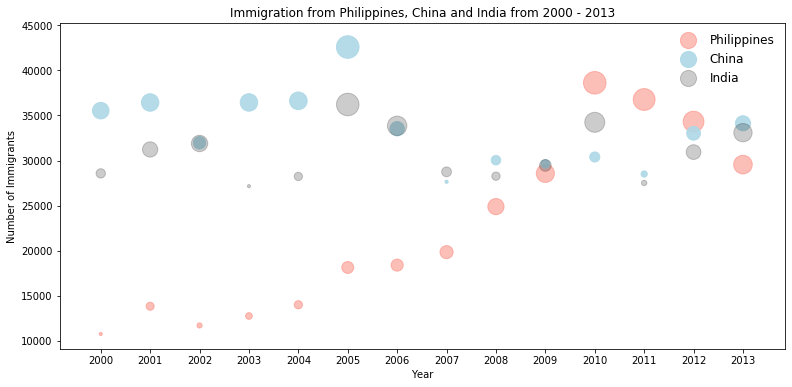

In [14]:
# Philippines
ax0 = df_top5_2013.plot(kind='scatter', x='Year', y='Philippines', figsize=(13, 6), alpha=0.5, color='salmon', s=norm_Philippines * 500 + 10)

# China
ax1 = df_top5_2013.plot(kind='scatter', x='Year', y='China', alpha=0.9, color="lightblue", s=norm_China * 500 + 10, ax = ax0)
                   
# India
ax2 = df_top5_2013.plot(kind='scatter', x='Year', y='India', alpha=0.2, color="black", s=norm_India * 500 + 10, ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Philippines, China and India from 2000 - 2013')
ax0.legend(['Philippines', 'China', 'India'], loc='best', fontsize='large', bbox_to_anchor=(1, 1), frameon = False)

## How did the Immigration Flow looked like through 2010-2013?

#### Data Preparation for the visualization

In [15]:
cols_to_keep = ['2010','2011', '2012', '2013']
df_2000 = df_imcanada[cols_to_keep]
df_2000['Total'] = df_2000.sum(axis=1)
df_2000.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_2000.head(5)
df_top5

,2010,2011,2012,2013,Total
Country,,,,,
Philippines,38617,36765,34315,29544,139241
China,30391,28502,33024,34129,126046
India,34235,27509,30933,33087,125764
Pakistan,6811,7468,11227,12603,38109
Iran (Islamic Republic of),7477,7479,7534,11291,33781


In [16]:
# let's create a new dataframe for these three countries 
df_2010 = df_imcanada.loc[['Philippines', 'China', 'India', 'Pakistan', 'Iran (Islamic Republic of)'], :]

# let's take a look at our dataframe
df_2010

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


### Function for a Waffle Plot

In [17]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_2010.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    plt.figure(figsize=(25, 10))
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.bone
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add gridlines based on minor ticks
    ax.grid(which='minor', color='lightblue', linestyle='-', linewidth=1)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpl.patches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
        
    )
    plt.title('Immigration to Canada from 5 countries over 2010 - 2013')
    plt.show()

Total number of tiles is 400
Philippines: 90
China: 116
India: 121
Pakistan: 42
Iran (Islamic Republic of): 31


<Figure size 1800x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

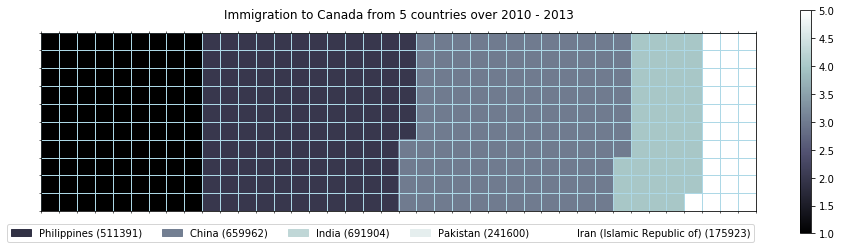

In [18]:
create_waffle_chart(df_2010.index.values, df_2010['Total'], 10, 40, plt.cm.bone, value_sign='')